In [1]:
# imports for using the notebook

import pandas as pd
import sys
sys.path.append('../')
from embedding_functions_hugo.embedding_functions import *
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy import genfromtxt
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, BisectingKMeans, AgglomerativeClustering, FeatureAgglomeration
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Specifying datasets from different reddit pages

df_gaming = pd.read_csv('../data/scrapes/gaming.csv')
df_satis = pd.read_csv('../data/scrapes/SatisfactoryGame.csv')
df_marauders = pd.read_csv('../data/scrapes/MaraudersGame.csv')
df_tarkov = pd.read_csv('../data/scrapes/EscapefromTarkov.csv')
df_politics = pd.read_csv('../data/scrapes/politics.csv')


# Datasets post cleaning the text
# df_politics['cleaned_text'] = prep_pipeline(df_politics, 'comment_text')
# df_politics['short'] = shorten_sens(df_politics['cleaned_text'], 50)

# Function to speed up the process: 

def shorten_and_clean_dataset (comment_csv, comment_column : str, desired_comment_length : int):
    dataframe = pd.read_csv(comment_csv)
    dataframe['cleaned_text'] = prep_pipeline(dataframe, comment_column)
    dataframe['short'] = shorten_sens(dataframe['cleaned_text'], desired_comment_length)
    return dataframe

In [3]:
# sen_leng = []
# for i in df_politics['short']:
#     sen_leng.append(len(i.split()))


# print(np.percentile(sen_leng, 25))
# print(np.percentile(sen_leng, 50))
# print(np.percentile(sen_leng, 75))
# print(np.percentile(sen_leng, 99))
# print(np.mean(sen_leng))
# print(np.median(sen_leng))

In [4]:
# authors = df_politics.values[:,-2]

In [5]:
def save_embeddings_as_npy(destination_path : str, comment_csv, comment_column : str, desired_comment_length : int):
    '''
    Nlp pipeline function which takes a pandas dataframe and relevant columns, performs preprocessing steps, uses sentence_transformer embeddings and saves the embeddings as a csv file.
    '''
    sentences = shorten_and_clean_dataset(comment_csv, comment_column, desired_comment_length)
    embeddings = embed_comments(sentences['short'])
    return np.save(destination_path, embeddings)
   # return savetxt(destination_path, embeddings, delimiter = ',')

### UNCOMMENT BELOW TO DO EMBEDDINGS AND SAVE THEM

# save_embeddings_as_npy('../data/embeddings/politics_embeddings.npy', '../data/scrapes/politics.csv', 'comment_text', 50)
# save_embeddings_as_npy('../data/embeddings/gaming_embeddings.npy', '../data/scrapes/gaming.csv', 'comment_text', 50)
# save_embeddings_as_npy('../data/embeddings/marauders_embeddings.npy', '../data/scrapes/MaraudersGame.csv', 'comment_text', 50)
# save_embeddings_as_npy('../data/embeddings/tarkov_embeddings.npy', '../data/scrapes/EscapefromTarkov.csv', 'comment_text', 50)
# save_embeddings_as_npy('../data/embeddings/satisfactory_embeddings.npy', '../data/scrapes/SatisfactoryGame.csv', 'comment_text', 50)

In [6]:
def pair_users_embeddings(dataframe, embeddings, average_out_comments = False):
    usernames = dataframe['comment_author']
    user_dictionary = {}
    for author, embedded_comment in zip(usernames, embeddings):
        if author not in user_dictionary.keys():
            user_dictionary[author] = []
            user_dictionary[author].append(embedded_comment)
        else:
            user_dictionary[author].append(embedded_comment)
    if average_out_comments:
        for user in user_dictionary:
            number_or_comments = len(user_dictionary[user])
            user_dictionary[user] = sum(user_dictionary[user])/number_or_comments
    return user_dictionary

In [7]:
# LOADING EMBEDDINGS FROM FILES

politics_embeddings = np.load('../data/embeddings/politics_embeddings.npy')
gaming_embeddings = np.load('../data/embeddings/gaming_embeddings.npy')
marauders_embeddings = np.load('../data/embeddings/marauders_embeddings.npy')
tarkov_embeddings = np.load('../data/embeddings/tarkov_embeddings.npy')

# include below when the satisfactory embeddings are done
# satisfactory_embeddings = np.load('../data/embeddings/satisfactory_embeddings.npy')

In [8]:
politics_user_embeddings = pair_users_embeddings(df_tarkov, tarkov_embeddings, True)

In [9]:
# pca = PCA(n_components=2)
# two_dimensional_embeddings = pca.fit_transform(list(politics_user_embeddings.values()))

# kmeans = KMeans(n_clusters=2)

# classes = kmeans.fit_predict(two_dimensional_embeddings)

In [10]:
def reduce_dims_and_kmeans(user_embedding_pairs, num_of_dimensions):
    '''
    Current version only works w 2 colors. 
    '''
    # Set PCA to desired number of dimensions
    pca = PCA(n_components=num_of_dimensions)


    pca_embeddings = pca.fit_transform(list(user_embedding_pairs.values()))

    kmeans = KMeans(n_clusters=2, random_state=0) 

    classes = kmeans.fit_predict(pca_embeddings)


    label_color_map = {0 : 'r',1 : 'g'}
    label_color = [label_color_map[l] for l in classes]
    plt.scatter(pca_embeddings[:,0], pca_embeddings[:,1], c=label_color)

C:\Users\thede\Anaconda3\envs\Bachelor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


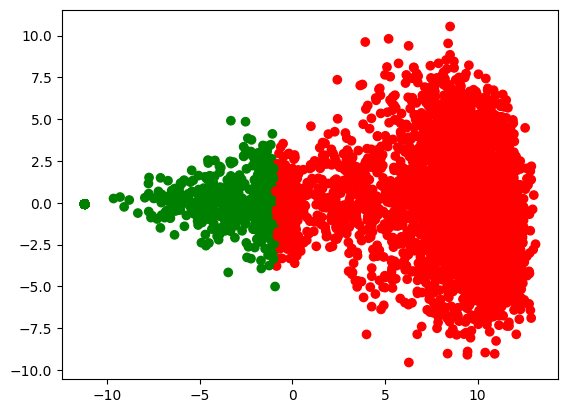

In [11]:
reduce_dims_and_kmeans(politics_user_embeddings, 2)

In [120]:
def reduce_to_one_dimension_kmeans(user_embedding_pairs):
    '''
    Current version only works w 2 colors. 
    '''
    # Set PCA to desired number of dimensions
    pca = PCA(n_components=1)


    pca_embeddings = pca.fit_transform(list(user_embedding_pairs.values()))

    kmeans = KMeans(n_clusters=2, random_state=0) 

    classes = kmeans.fit_predict(pca_embeddings)

    return (user_embedding_pairs.keys(), pca_embeddings)

politics_user_embeddings = pair_users_embeddings(df_politics, politics_embeddings, True)
Squeem = reduce_to_one_dimension_kmeans(politics_user_embeddings)
x_axis = []
for name,emb in zip(Squeem[0], Squeem[1]):
    x_axis.append([str(name),emb])

def sortie(beb):
    return beb[0]
x_axis = sorted(x_axis, key=sortie)
len(x_axis)

C:\Users\thede\Anaconda3\envs\Bachelor\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10383

In [122]:
# Test for making new dataframe with columns: 
# should be exportable to networkx - preferably edgelist
# Author (node_id),pca_x-axis , post_id

authors = []
x_axis = []
posts = []

# df_politics = df_politics.drop('post_text', axis=1).dropna()
df_politics

,post_title,post_id,post_score,post_total_comments,post_url,comment_author,comment_text
8299,I'm a Florida teacher who's been forced to cov...,10mzhtl,24453,1082,https://www.reddit.com/r/politics/comments/10m...,---------0----------,Fuck that illegal alien Ron DeSantis
1022,George Santos used fake Jewish name on GoFundM...,10f6vtq,54730,2431,https://www.reddit.com/r/politics/comments/10f...,---Blix---,"No matter what you think of George Santos, you..."
6425,GOP House Oversight Chair Can’t Explain Why He...,10d29v4,28991,947,https://www.reddit.com/r/politics/comments/10d...,--harumph--,He is not capable of reason because he is a re...
10238,Trump's former chief of staff John Kelly had t...,10cuh0o,20234,483,https://www.reddit.com/r/politics/comments/10c...,-AngryPope,"This is sad, but not at all surprising."
13807,House Republicans just proposed ending the stu...,10yqipm,13968,1698,https://www.reddit.com/r/politics/comments/10y...,-CJF-,"Yes, and that's not even the most radical thin..."
...,...,...,...,...,...,...,...
10843,New Yorkers want truth-challenged Rep. George ...,10jafch,18134,659,https://www.reddit.com/r/politics/comments/10j...,zztop610,"But, didn’t Santos save Mother Teresa and Nels..."
12070,Rep. George Santos Charged With Stealing Puppi...,10y79m8,17794,1045,https://www.reddit.com/r/politics/comments/10y...,zztop610,Please let this guy be a plant by Sacha Baron ...
3164,"George Santos' campaign spent more than $26,00...",10rp0kp,40924,1586,https://www.reddit.com/r/politics/comments/10r...,zztop610,What a fucking douchebag and what a fucking fr...
3791,DOJ has reportedly opened a criminal investiga...,10p92qc,39230,952,https://www.reddit.com/r/politics/comments/10p...,zztop610,"Ok, he is gonna finish his term"


In [47]:
df_politics = df_politics.sort_values(by='comment_author')
for ball in df_politics.iloc:
    ID, Author = ball[2], ball[6]
    authors.append(Author)
    posts.append(ID)
print(authors, posts)

['---------0----------', '---Blix---', '--harumph--', '-AngryPope', '-CJF-', '-ChiefLongBeef-', '-CoachMcGuirk-', '-Degaussed-', '-Economist-', '-Great-Scott-', '-Hypnotoad26', '-Hypnotoad26', '-Hypnotoad26', '-November15th-', '-Rem_Lezar69', '-The-Baba-Jaga-', '-Why-Not-This-Name-', '-bferis-', '-but-its-not-illegal', '-flame-retardant-', '-metaphased-', '-praetorr-', '00000000000004000000', '007meow', '007meow', '013ander', '0235', '0DarkNerdy', '0nlyhalfjewish', '0nlyhalfjewish', '0ogaBooga', '10-10--01-01', '1000_pi10ts', '100farts', '1015267', '1025Traveller', '108awake-', '10minutes_late', '10strip', '11timesover', '12358', '12jresult', '1313pd1313', '1313pd1313', '13Wayfarer', '13thJen', '13zerocool', '1500moody', '1968FullAlbum', '1984ToyotaCamry', '19southmainco', '19southmainco', '19southmainco', '1Eternallylost', '1Eternallylost', '1Ianjojo', '1Sluggo', '1Sluggo', '1arctek', '1buzer', '1dumb_punk', '1groovyfirefly', '1jobonthislousyship', '1lapulapu', '1mJustALurk3r', '1ofZu